🔍 EXPLORATORY DATA ANALYSIS
Loading cleaned dataset...
✅ Dataset loaded: (44689, 16)
📊 Label distribution:
label
0    23478
1    21211
Name: count, dtype: int64


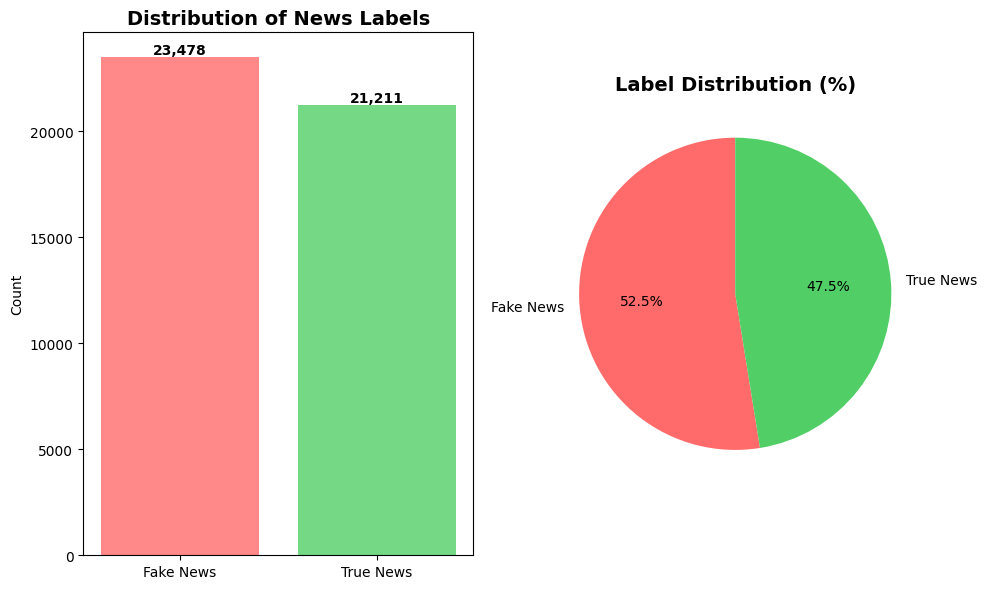

<Figure size 1200x800 with 0 Axes>

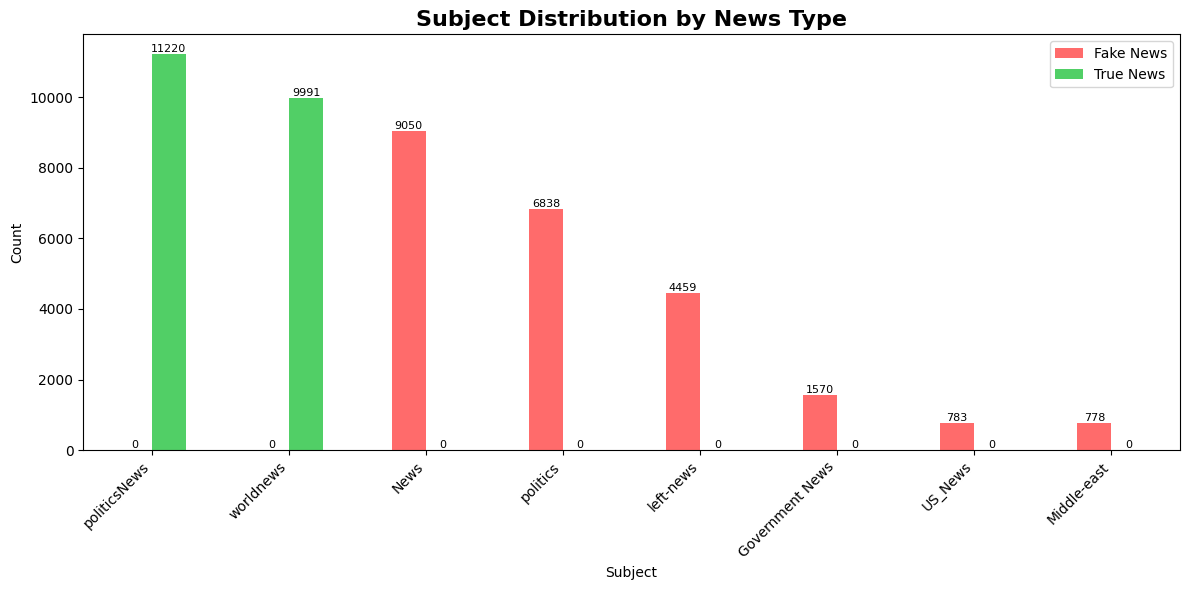

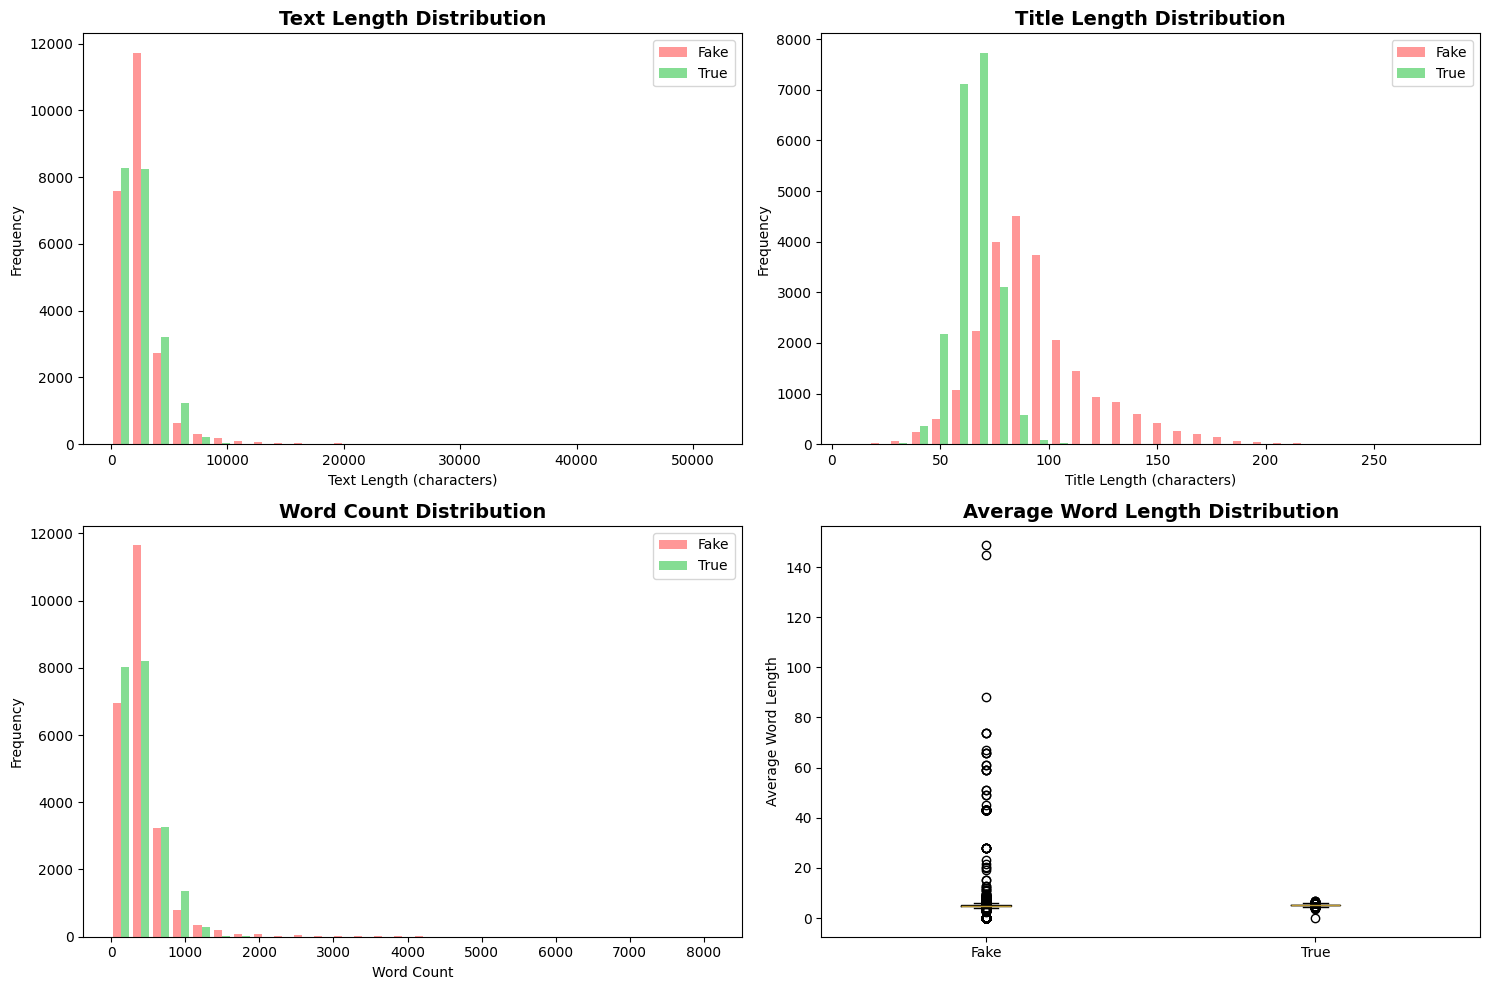

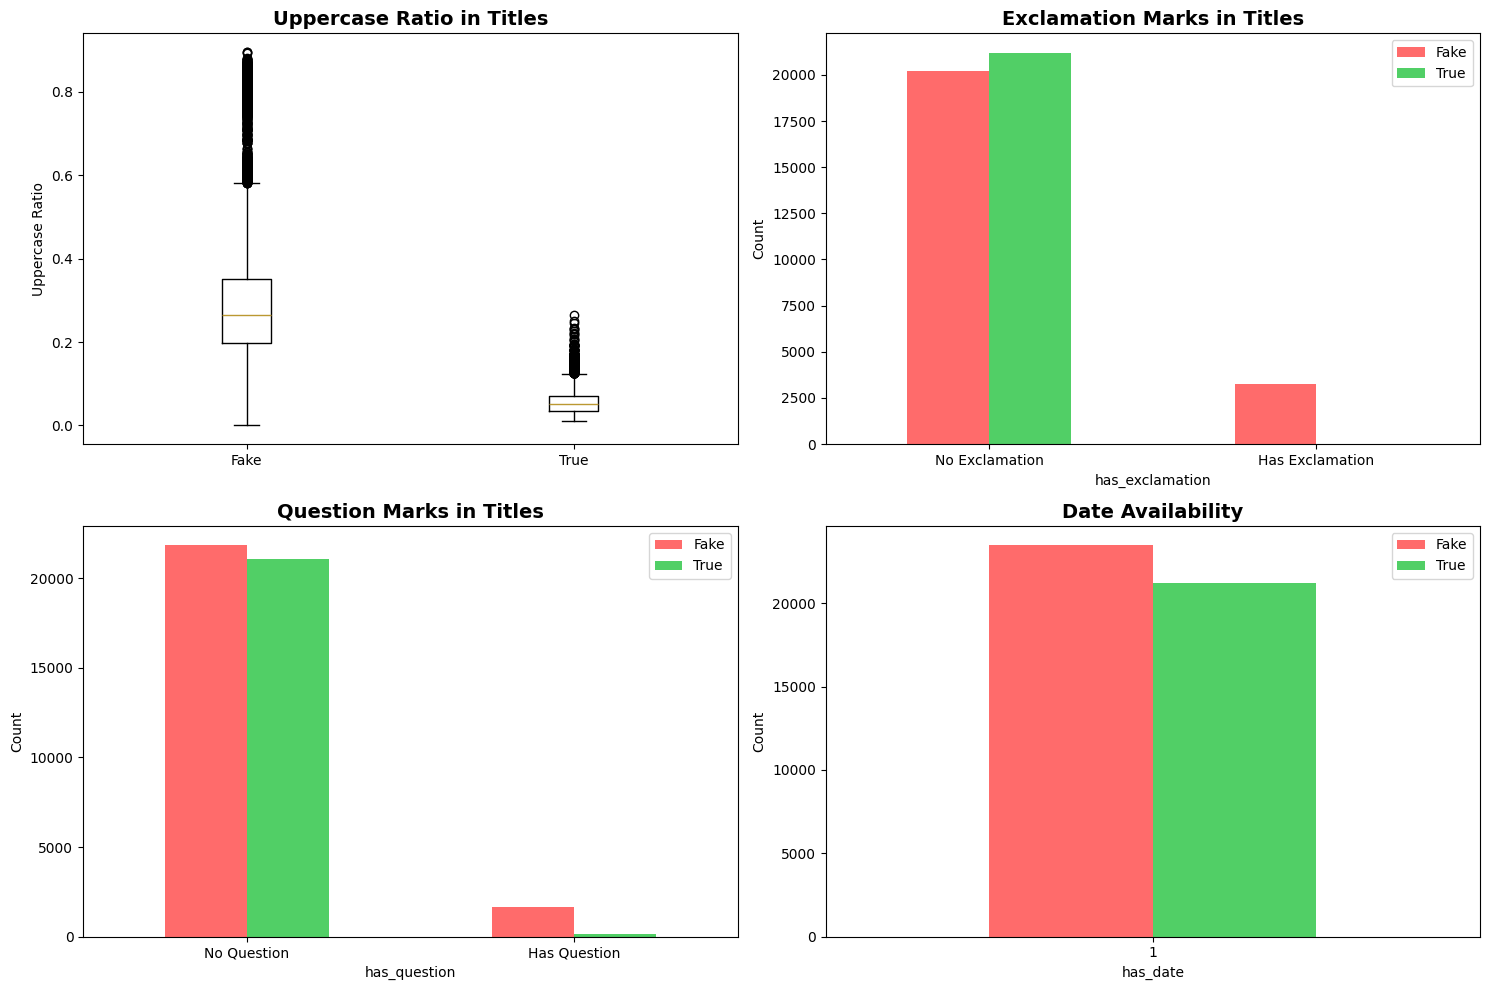

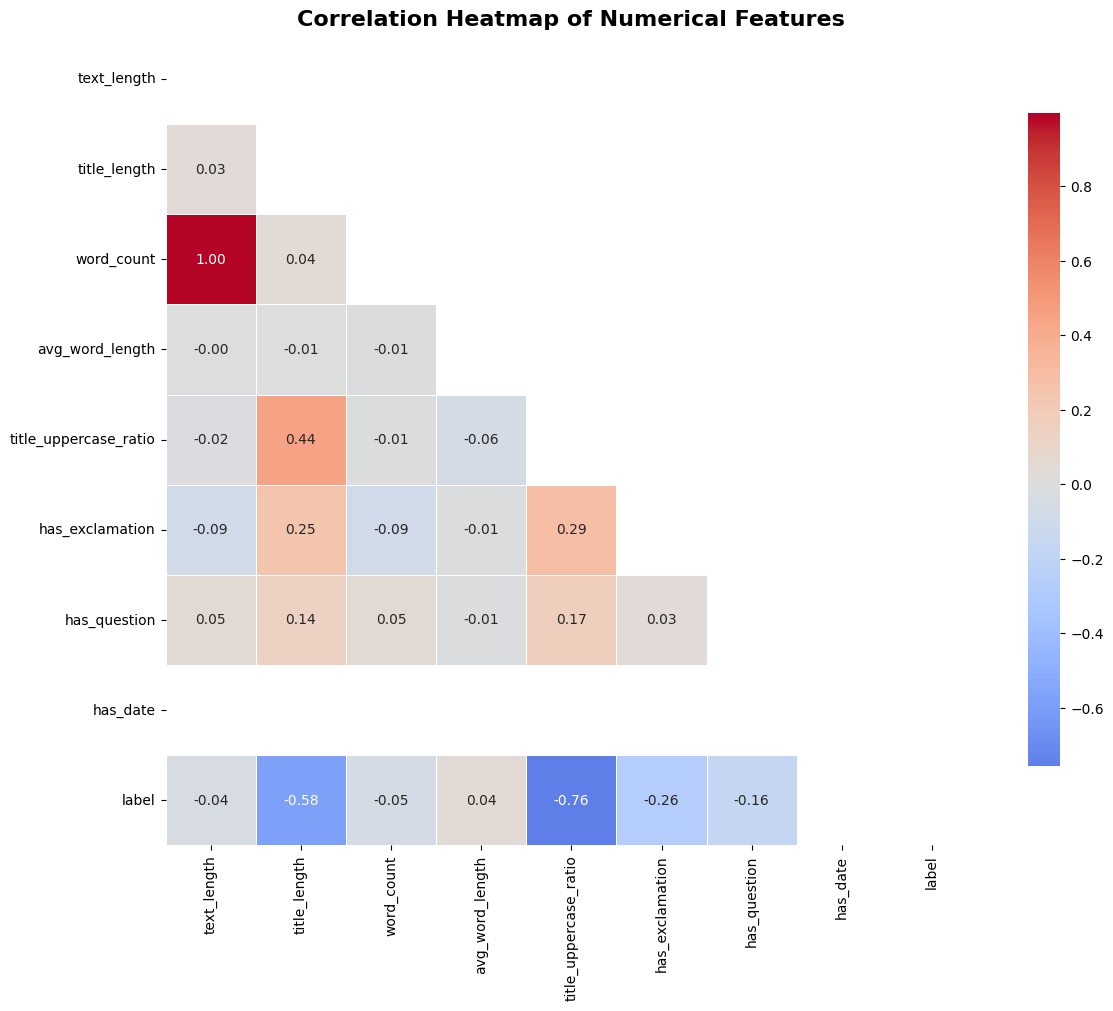

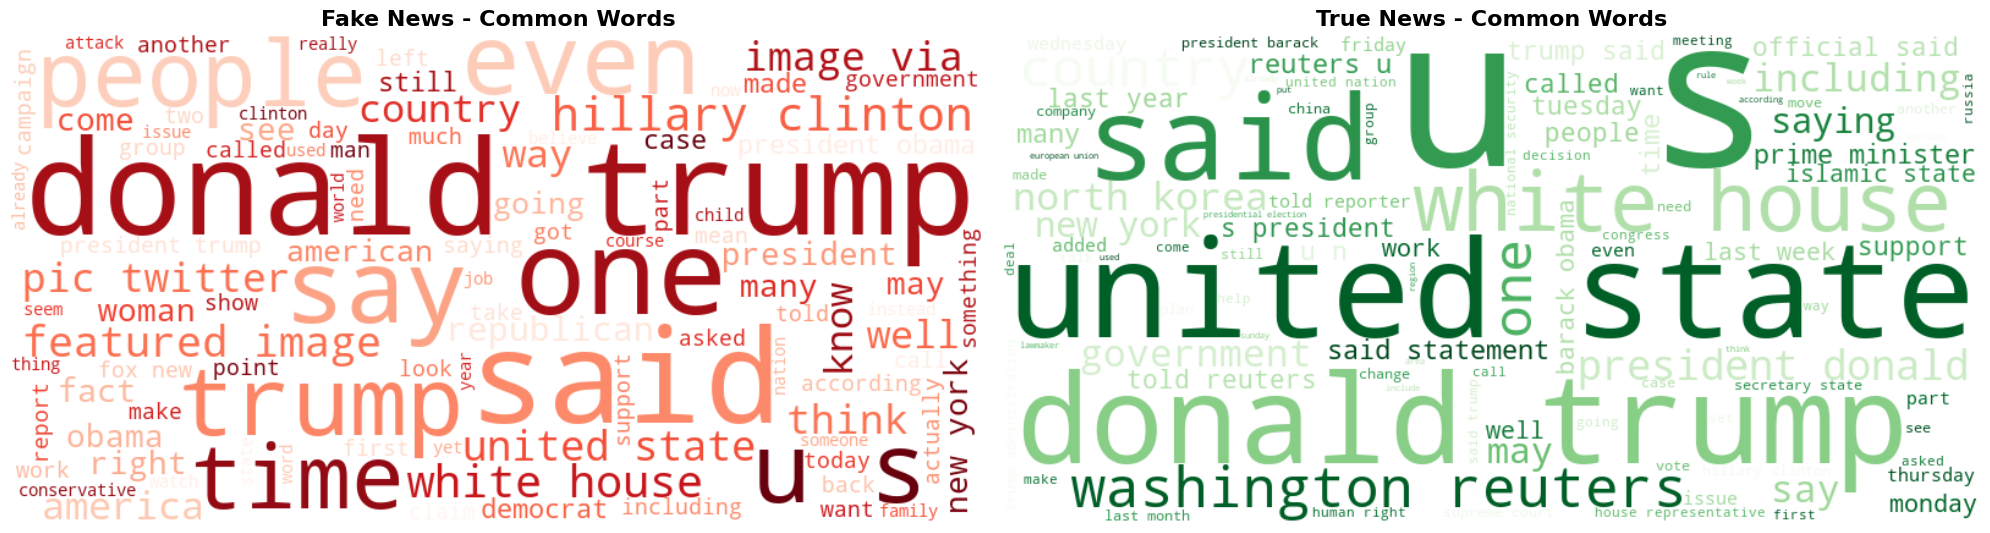


📈 SUMMARY STATISTICS

📊 Overall Dataset:
   Total articles: 44,689
   Fake news: 23,478 (52.5%)
   True news: 21,211 (47.5%)
   Unique subjects: 8

📝 Text Statistics by Label:

   Fake News:
     Avg text length: 2548 chars
     Avg title length: 94 chars
     Avg word count: 423 words
     Avg word length: 5.01 chars
     Titles with exclamation: 13.9%
     Titles with question: 7.0%
     Articles with date: 100.0%

   True News:
     Avg text length: 2378 chars
     Avg title length: 65 chars
     Avg word count: 385 words
     Avg word length: 5.18 chars
     Titles with exclamation: 0.1%
     Titles with question: 0.6%
     Articles with date: 100.0%

✅ EDA completed! Check the generated PNG files for visualizations.
   - label_distribution.png
   - subject_distribution.png
   - text_analysis.png
   - linguistic_features.png
   - correlation_heatmap.png
   - wordclouds.png


In [10]:
# eda_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

def load_cleaned_data():
    """Load the preprocessed dataset"""
    print("Loading cleaned dataset...")
    df = pd.read_csv('cleaned_news_dataset.csv')
    print(f"✅ Dataset loaded: {df.shape}")
    print(f"📊 Label distribution:")
    print(df['label'].value_counts())
    return df

def plot_label_distribution(df):
    """Plot distribution of news labels"""
    plt.figure(figsize=(10, 6))
    
    label_counts = df['label'].value_counts()
    colors = ['#ff6b6b', '#51cf66']
    labels = ['Fake News', 'True News']
    
    # Bar plot
    plt.subplot(1, 2, 1)
    bars = plt.bar(labels, label_counts.values, color=colors, alpha=0.8)
    plt.title('Distribution of News Labels', fontsize=14, fontweight='bold')
    plt.ylabel('Count')
    
    # Add value labels on bars
    for bar, count in zip(bars, label_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(label_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90)
    plt.title('Label Distribution (%)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('label_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_subject_analysis(df):
    """Analyze and plot subject distribution"""
    plt.figure(figsize=(12, 8))
    
    # Subject distribution by label
    subject_comparison = pd.crosstab(df['subject'], df['label'])
    subject_comparison = subject_comparison.reindex(subject_comparison.sum(axis=1).sort_values(ascending=False).index)
    
    ax = subject_comparison.plot(kind='bar', color=['#ff6b6b', '#51cf66'], figsize=(12, 6))
    plt.title('Subject Distribution by News Type', fontsize=16, fontweight='bold')
    plt.ylabel('Count')
    plt.xlabel('Subject')
    plt.legend(['Fake News', 'True News'])
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.savefig('subject_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return subject_comparison

def plot_text_length_analysis(df):
    """Analyze text and title length distributions"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Text length distribution
    axes[0,0].hist([df[df['label']==0]['text_length'], 
                    df[df['label']==1]['text_length']], 
                   bins=30, alpha=0.7, label=['Fake', 'True'], 
                   color=['#ff6b6b', '#51cf66'])
    axes[0,0].set_title('Text Length Distribution', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Text Length (characters)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()
    
    # Title length distribution
    axes[0,1].hist([df[df['label']==0]['title_length'], 
                    df[df['label']==1]['title_length']], 
                   bins=30, alpha=0.7, label=['Fake', 'True'],
                   color=['#ff6b6b', '#51cf66'])
    axes[0,1].set_title('Title Length Distribution', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Title Length (characters)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
    
    # Word count distribution
    axes[1,0].hist([df[df['label']==0]['word_count'], 
                    df[df['label']==1]['word_count']], 
                   bins=30, alpha=0.7, label=['Fake', 'True'],
                   color=['#ff6b6b', '#51cf66'])
    axes[1,0].set_title('Word Count Distribution', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Word Count')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()
    
    # Average word length
    axes[1,1].boxplot([df[df['label']==0]['avg_word_length'],
                       df[df['label']==1]['avg_word_length']],
                      labels=['Fake', 'True'])
    axes[1,1].set_title('Average Word Length Distribution', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Average Word Length')
    
    plt.tight_layout()
    plt.savefig('text_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_linguistic_features(df):
    """Analyze linguistic features - FIXED VERSION"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Uppercase ratio in titles
    axes[0,0].boxplot([df[df['label']==0]['title_uppercase_ratio'],
                       df[df['label']==1]['title_uppercase_ratio']],
                      labels=['Fake', 'True'])
    axes[0,0].set_title('Uppercase Ratio in Titles', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Uppercase Ratio')
    
    # Exclamation marks usage - FIXED
    exclamation_comparison = pd.crosstab(df['has_exclamation'], df['label'])
    exclamation_plot = exclamation_comparison.plot(kind='bar', ax=axes[0,1], color=['#ff6b6b', '#51cf66'])
    axes[0,1].set_title('Exclamation Marks in Titles', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Count')
    axes[0,1].legend(['Fake', 'True'])
    
    # Get the current x-tick labels and set them properly
    current_labels = [tick.get_text() for tick in axes[0,1].get_xticklabels()]
    new_labels = ['No Exclamation', 'Has Exclamation'] if len(current_labels) == 2 else current_labels
    axes[0,1].set_xticklabels(new_labels, rotation=0)
    
    # Question marks usage - FIXED
    question_comparison = pd.crosstab(df['has_question'], df['label'])
    question_plot = question_comparison.plot(kind='bar', ax=axes[1,0], color=['#ff6b6b', '#51cf66'])
    axes[1,0].set_title('Question Marks in Titles', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Count')
    axes[1,0].legend(['Fake', 'True'])
    
    # Get the current x-tick labels and set them properly
    current_labels = [tick.get_text() for tick in axes[1,0].get_xticklabels()]
    new_labels = ['No Question', 'Has Question'] if len(current_labels) == 2 else current_labels
    axes[1,0].set_xticklabels(new_labels, rotation=0)
    
    # Date availability - FIXED
    date_comparison = pd.crosstab(df['has_date'], df['label'])
    date_plot = date_comparison.plot(kind='bar', ax=axes[1,1], color=['#ff6b6b', '#51cf66'])
    axes[1,1].set_title('Date Availability', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Count')
    axes[1,1].legend(['Fake', 'True'])
    
    # Get the current x-tick labels and set them properly
    current_labels = [tick.get_text() for tick in axes[1,1].get_xticklabels()]
    new_labels = ['No Date', 'Has Date'] if len(current_labels) == 2 else current_labels
    axes[1,1].set_xticklabels(new_labels, rotation=0)
    
    plt.tight_layout()
    plt.savefig('linguistic_features.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_correlation_heatmap(df):
    """Plot correlation heatmap of numerical features"""
    # Select numerical features
    numerical_features = df[['text_length', 'title_length', 'word_count', 
                            'avg_word_length', 'title_uppercase_ratio',
                            'has_exclamation', 'has_question', 'has_date', 'label']]
    
    plt.figure(figsize=(12, 10))
    corr_matrix = numerical_features.corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
    
    plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return corr_matrix

def generate_wordclouds(df):
    """Generate word clouds for fake and true news"""
    try:
        # Combine all text for each category
        fake_text = ' '.join(df[df['label'] == 0]['cleaned_text'].dropna())
        true_text = ' '.join(df[df['label'] == 1]['cleaned_text'].dropna())
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Fake news word cloud
        if fake_text.strip():
            wordcloud_fake = WordCloud(width=800, height=400, background_color='white',
                                      colormap='Reds', max_words=100).generate(fake_text)
            ax1.imshow(wordcloud_fake, interpolation='bilinear')
            ax1.set_title('Fake News - Common Words', fontsize=16, fontweight='bold')
            ax1.axis('off')
        else:
            ax1.text(0.5, 0.5, 'No text data available', ha='center', va='center', transform=ax1.transAxes)
            ax1.set_title('Fake News - Common Words', fontsize=16, fontweight='bold')
            ax1.axis('off')
        
        # True news word cloud
        if true_text.strip():
            wordcloud_true = WordCloud(width=800, height=400, background_color='white',
                                      colormap='Greens', max_words=100).generate(true_text)
            ax2.imshow(wordcloud_true, interpolation='bilinear')
            ax2.set_title('True News - Common Words', fontsize=16, fontweight='bold')
            ax2.axis('off')
        else:
            ax2.text(0.5, 0.5, 'No text data available', ha='center', va='center', transform=ax2.transAxes)
            ax2.set_title('True News - Common Words', fontsize=16, fontweight='bold')
            ax2.axis('off')
        
        plt.tight_layout()
        plt.savefig('wordclouds.png', dpi=300, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"WordCloud generation failed: {e}")

def summary_statistics(df):
    """Generate summary statistics"""
    print("\n" + "="*60)
    print("📈 SUMMARY STATISTICS")
    print("="*60)
    
    # Overall statistics
    print(f"\n📊 Overall Dataset:")
    print(f"   Total articles: {len(df):,}")
    print(f"   Fake news: {len(df[df['label'] == 0]):,} ({len(df[df['label'] == 0])/len(df)*100:.1f}%)")
    print(f"   True news: {len(df[df['label'] == 1]):,} ({len(df[df['label'] == 1])/len(df)*100:.1f}%)")
    print(f"   Unique subjects: {df['subject'].nunique()}")
    
    # Text statistics by label
    print(f"\n📝 Text Statistics by Label:")
    
    for label, name in [(0, 'Fake News'), (1, 'True News')]:
        subset = df[df['label'] == label]
        print(f"\n   {name}:")
        print(f"     Avg text length: {subset['text_length'].mean():.0f} chars")
        print(f"     Avg title length: {subset['title_length'].mean():.0f} chars")
        print(f"     Avg word count: {subset['word_count'].mean():.0f} words")
        print(f"     Avg word length: {subset['avg_word_length'].mean():.2f} chars")
        print(f"     Titles with exclamation: {subset['has_exclamation'].mean()*100:.1f}%")
        print(f"     Titles with question: {subset['has_question'].mean()*100:.1f}%")
        print(f"     Articles with date: {subset['has_date'].mean()*100:.1f}%")

def main():
    """Main function for EDA"""
    print("=" * 60)
    print("🔍 EXPLORATORY DATA ANALYSIS")
    print("=" * 60)
    
    # Load data
    df = load_cleaned_data()
    
    # Generate all visualizations
    plot_label_distribution(df)
    subject_analysis = plot_subject_analysis(df)
    plot_text_length_analysis(df)
    plot_linguistic_features(df)  # This is now fixed
    correlation_matrix = plot_correlation_heatmap(df)
    generate_wordclouds(df)
    
    # Summary statistics
    summary_statistics(df)
    
    print(f"\n✅ EDA completed! Check the generated PNG files for visualizations.")
    print(f"   - label_distribution.png")
    print(f"   - subject_distribution.png") 
    print(f"   - text_analysis.png")
    print(f"   - linguistic_features.png")
    print(f"   - correlation_heatmap.png")
    print(f"   - wordclouds.png")

if __name__ == "__main__":
    main()